In [153]:
import numpy as np
import matplotlib.pyplot as plt
import pygame

Download data from here: http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -> unzip it to tmp

In [154]:
# Dataset
with open('./tmp/train-images-idx3-ubyte', "rb") as f:
    dat = f.read()
    X = np.frombuffer(dat, dtype=np.uint8).copy()[0x10:].reshape((-1,784))


In [155]:
X_binary = np.where(X>20, 1, -1)
#memories_list = np.array([X_binary[np.random.randint(len(X))]])
memories_list = np.array([X_binary[1]])

In [156]:
print(np.array(memories_list).shape[1])

784


In [157]:
class Hopfield_Net:
    def __init__(self, input):
        self.memory = np.array(input)
        
        # single vs multiple memories
        if self.memory.size > 1:
            self.n = self.memory.shape[1]
        else:
            self.n = len(self.memory)
            
        self.state = np.random.randint(-2, 2, (self.n, 1))
        self.weights = np.zeros((self.n, self.n))
        self.energies = [] # track energy
        
    def network_learning(self):
        self.weights = (1 / self.memory.shape[0] * self.memory.T @ self.memory)
        np.fill_diagonal(self.weights, 0)
        
    def update_network_state(self, n_update):
        for neuron in range(n_update):
            self.rand_index = np.random.randint(0, self.n)
            self.index_activation = np.dot(self.weights[self.rand_index, :], self.state)
            
            if self.index_activation < 0:
                self.state[self.rand_index] = -1
            else:
                self.state[self.rand_index] = 1
                
    def compute_energy(self):
        self.energy = -0.5 * np.dot(np.dot(self.state.T, self.weights), self.state)
        self.energies.append(self.energy)

In [158]:
H_Net = Hopfield_Net(memories_list)
H_Net.network_learning()

error: display Surface quit

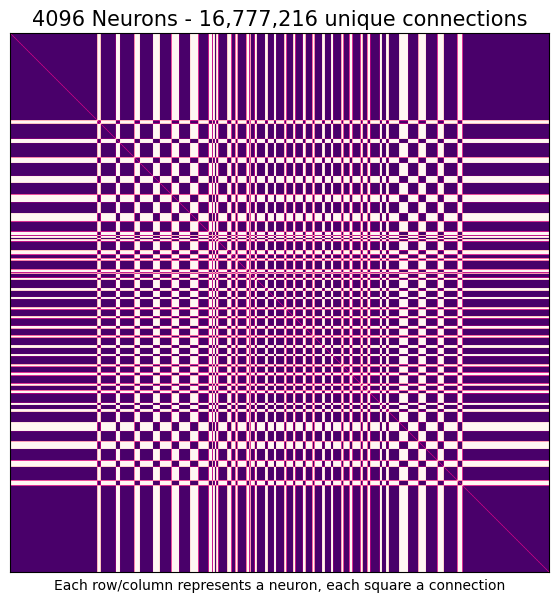

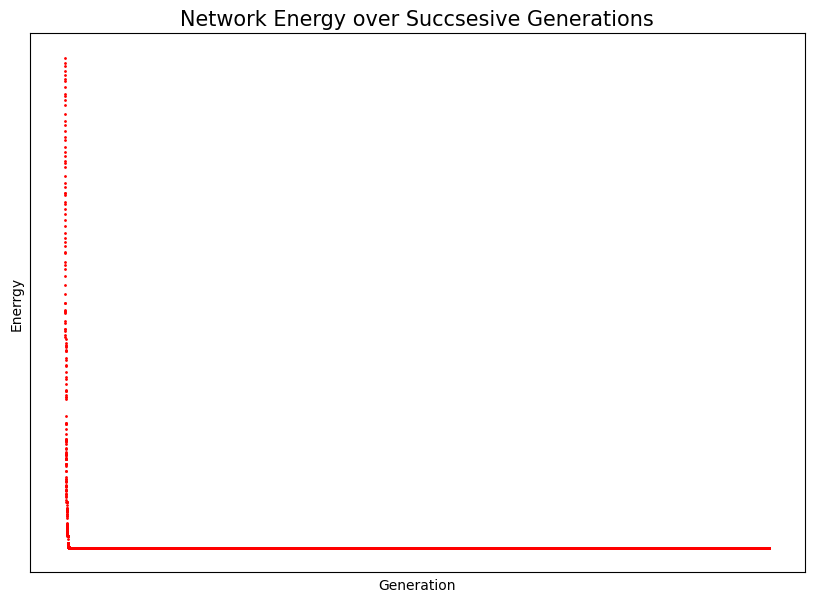

: 

In [159]:
cellsize = 20
pygame.init()
surface = pygame.display.set_mode((28*cellsize, 28*cellsize))
pygame.display.set_caption("  ")

Running = True

while Running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            Running = False
            
            plt.figure("weights", figsize=(10, 7))
            plt.imshow(H_Net.weights, cmap='RdPu')
            plt.xlabel('Each row/column represents a neuron, each square a connection')
            
            plt.title("4096 Neurons - 16,777,216 unique connections", fontsize=15)
            plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
            
            plt.figure("Energy", figsize=(10, 7))
            x = np.arange(len(H_Net.energies))
            plt.scatter(x, np.array(H_Net.energies), s=1, color='red')
            plt.xlabel("Generation")
            plt.ylabel("Enerrgy")
            plt.title("Network Energy over Succsesive Generations", fontsize=15)
            plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
            
            pygame.quit()
            
    cells = H_Net.state.reshape(28, 28).T
    surface.fill((211, 211, 211))
    
    for r, c in np.ndindex(cells.shape):
        if cells[r, c] == -1:
            col = (135, 206, 250)
        elif cells[r, c] == 1:
            col = (0, 0, 128)
        else:
            col = (255, 140, 0)
        pygame.draw.rect(surface, col, (r * cellsize, c*cellsize, cellsize, cellsize))
        
    H_Net.update_network_state(16)
    H_Net.compute_energy()
    pygame.display.update()
    pygame.time.wait(50)